**Leng Her**

**Lab 10**

**November 15, 2022**

#Overview


In order to determine if there will be an overall decrease in area thickness of the Artic and Antractic ice (ice melting), we will be using two univariate time series models to forecast the area thickness of the Artic and Antartic for the next few months/years. The two univariate time series models that will be used are the ARIMA and SARIMA models. The ARIMA model is a machine learning technique that utilizes statistical analysis, to understand the time series dataset or predict future trends (Hayes, A.). The SARIMA models is very similar to the ARIMA model, the only difference is that the SARIMA model also takes into consideration any seasonality patterns, whereas the ARIMA model does not (Real statistics using Excel). By utilizing these techniques we will try to forecast the area thickness of the Artic and Antractic ice.

**References:**

1. https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

2. https://www.datasciencesmachinelearning.com/2019/01/arimasarima-in-python.html

3. https://www.wisdomgeek.com/development/machine-learningsarima-forecast-seasonal-data-using-python/

4. https://medium.com/mlearning-ai/how-to-build-sarima-model-in-python-7ae83b14c884

5. https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMAResults.get_forecast.html#statsmodels.tsa.arima.model.ARIMAResults.get_forecast

6. https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_forecasting.html

7. https://medium.datadriveninvestor.com/time-series-prediction-using-sarimax-a6604f258c56

8. https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/


9. Hayes, A. (2022, June 24). Autoregressive Integrated moving average (ARIMA). Investopedia. Retrieved November 15, 2022, from https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp 

10. Real statistics using Excel. Real Statistics Using Excel. (n.d.). Retrieved November 15, 2022, from https://www.real-statistics.com/time-series-analysis/seasonal-arima-sarima/ 



#Data


The dataset was obtained from National Snow and Ice Data Center (https://nsidc.org/data/g02135). The data we will be using is a combined dataset which contains the area of thickness and the month and year as the index. For more information on the dataset please refer to the link: https://nsidc.org/data/g02135.

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

In [6]:
#Loading data into dataframe to be used,combine all 12 csv files into one dataframe so we have proper dataset with all 12 months
df = pd.concat(map(pd.read_csv, ['N_01_extent_v3.0.csv', 'N_02_extent_v3.0.csv','N_03_extent_v3.0.csv','N_04_extent_v3.0.csv','N_05_extent_v3.0.csv','N_06_extent_v3.0.csv','N_07_extent_v3.0.csv'
,'N_08_extent_v3.0.csv','N_09_extent_v3.0.csv','N_10_extent_v3.0.csv','N_11_extent_v3.0.csv' ,'N_12_extent_v3.0.csv']))
#remove the spaces that appear in column headings
df.columns = df.columns.str.replace(' ', '') 
#dropping bad rows from dataset
df = df[df['area'] != -9999.00]
#dropping columns we don't need
df=df.drop(['data-type','region','extent'], axis=1)
#create a unique time column to sort on
df["time"] = df["year"].apply(str) + "-" + df["mo"].apply(str).str.zfill(2)
#drop the old columns we don't need now
df=df.drop(['year', 'mo'], axis=1)
#make sure our new unique column is the index which is important for time series data (needs to be in order!)
df = df.set_index('time')
#sort it!
df = df.sort_values(by=['time'])
#make sure it's in order
df.head(50)


,area
time,
1978-11,9.04
1978-12,10.90
1979-01,12.41
1979-02,13.18
1979-03,13.21
1979-04,12.53
1979-05,11.11
1979-06,9.34
1979-07,6.69


#EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 1978-11 to 2021-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    513 non-null    float64
dtypes: float64(1)
memory usage: 8.0+ KB


No null values

In [8]:
df.columns

Index(['area'], dtype='object')

In [9]:
print(f"The number of columns in the dataset is: {df.shape[1]}")
print(f"The number of rows in the dataset is: {df.shape[0]}")

The number of columns in the dataset is: 1
The number of rows in the dataset is: 513


In [10]:
df.describe()

,area
count,513.000000
mean,9.272300
std,3.246864
min,2.410000
25%,6.270000
50%,9.950000
75%,12.290000
max,13.900000


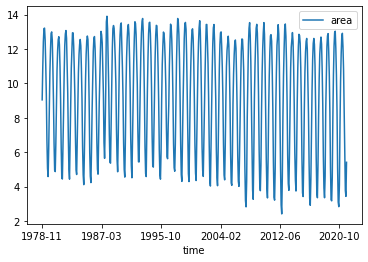

In [11]:
df.plot()

From this plot we can see that the data is stationary and we can use the original series for our model. We can double-check via ACF and PACF plots.

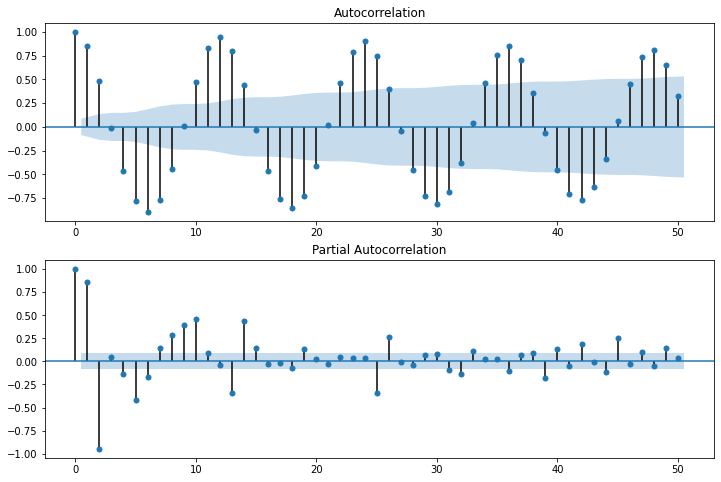

In [12]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['area'], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['area'], lags=50, ax=ax2)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


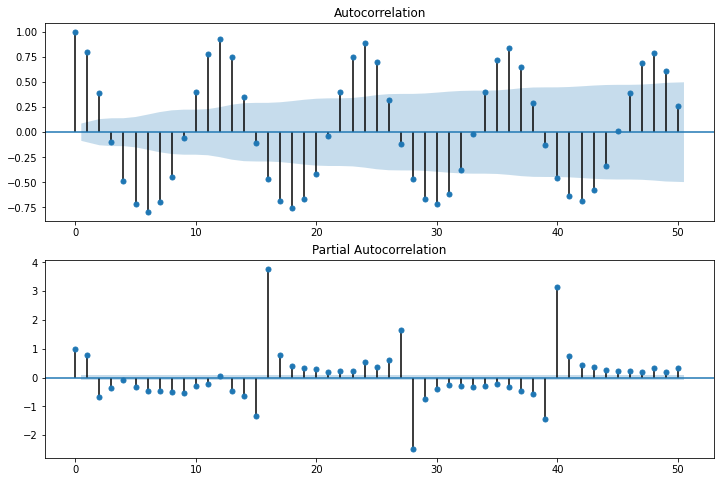

In [13]:
#First order differencing 

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['area'].diff().dropna(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['area'].diff().dropna(), lags=50, ax=ax2)
plt.show()

p = 2, q = 3


From the PACF graph if the original series contains 3 lags that are greater than the critical value setting our q to 3. From the ACF graph we can observe that 2 lags that are greater than the critical boundary with a third lag, however the third lag is not too far from the critical boundary so we will set p to 2.

From the second plot we used first order differencing and nothing changed for the ACF plot in the original and the first order. However there seems to be a difference in the PACF plot with the first order plot showing a trend similar to the ACF plot.



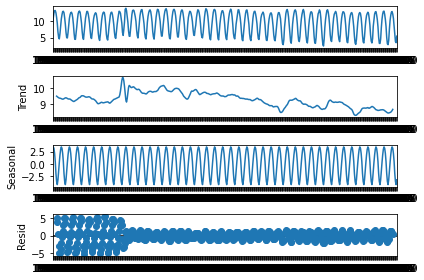

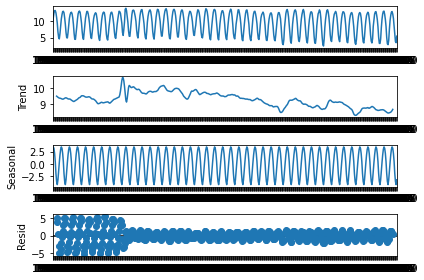

In [14]:
seasonal_decompose(df, model='additive', period= 12).plot() #chose 12 as period because data is based on a monthly basis. 

Because our plot shows that our data is stationary in the seasonal section, this tells us that the d value for our ARIMA model can be 0. 

#Models

In [15]:
train, test = df.iloc[:371,0], df.iloc[371:,0]
print(train.tail())
test.head()

time
2009-08     4.16
2009-09     3.76
2009-10     5.24
2009-11     8.36
2009-12    10.59
Name: area, dtype: float64


time
2010-01    12.04
2010-02    12.96
2010-03    13.53
2010-04    12.85
2010-05    10.88
Name: area, dtype: float64

In [16]:
model = ARIMA(train, order = (2,0,3))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [17]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                   area   No. Observations:                  371
Model:                     ARMA(2, 3)   Log Likelihood                -295.072
Method:                       css-mle   S.D. of innovations              0.532
Date:                Wed, 16 Nov 2022   AIC                            604.145
Time:                        02:50:56   BIC                            631.558
Sample:                             0   HQIC                           615.033
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4675      0.056    169.660      0.000       9.358       9.577
ar.L1.area     1.6789      0.017    100.072      0.000       1.646       1.712
ar.L2.area    -0.9479      0.016    -57.826      0.0

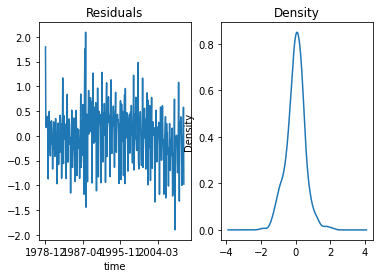

In [18]:
#plot residules
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title = "Residuals", ax = ax[0])
residuals.plot(title = "Density", kind = "kde", ax = ax[1])

plt.show()

Density plot shows that our values are normally distributed.

In [19]:
residuals.describe()

count    370.000000
mean       0.005808
std        0.540403
min       -1.898491
25%       -0.281239
50%        0.030063
75%        0.321142
max        2.092207
dtype: float64

Our mean is extremely close to 0 so this means our ARIMA model has very little deficiency.

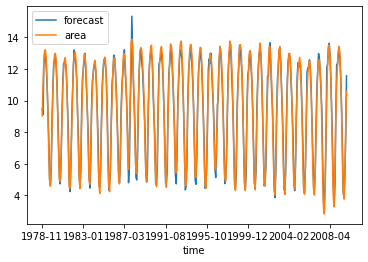

In [20]:
model_fit.plot_predict(start = train.index[0], end = train.index[-1] )
plt.show()

From this graph we can see that our ARIMA model is accurate following along the same trend as the actual values for our training set.

In [21]:
fore_values = model_fit.forecast(steps = 142) #get forecast values to compare with actual

In [32]:
len(fore_values[0])

142

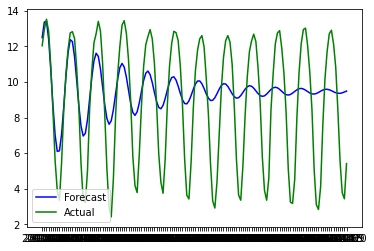

In [29]:
plt.plot(fore_values[0],c = "b", label = "Forecast")
plt.plot(test,c="g", label = "Actual")
plt.legend()
plt.show()

Here we can see that the ARIMA model fails to accurately predict the values after the first few values. Although the ARIMA value does follow the general trend of the actual values it fails in accuracy of values as seasonality increases.

>SARIMA model

In [23]:
Smodel = SARIMAX(train, order=(2, 0, 3), seasonal_order=(2, 0, 3, 12)) #fourth parameter for seasonal order is the frequency and from our data we choose 12 for 12 month basis

Smodel_fit = Smodel.fit()

print(Smodel_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               area   No. Observations:                  371
Model:             SARIMAX(2, 0, 3)x(2, 0, 3, 12)   Log Likelihood                -229.591
Date:                            Wed, 16 Nov 2022   AIC                            481.182
Time:                                    02:51:13   BIC                            524.260
Sample:                                         0   HQIC                           498.291
                                            - 371                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5560      0.046     34.147      0.000       1.467       1.645
ar.L2         -0.5574      0.039   

Our SARIMA model is considerably better than our ARIMA model as both the AIC and BIC values are lower than the ARIMA models.

The SARIMA model scores are: AIC = 481.182, BIC = 524.260.

The ARIMA model scores are: AIC = 604.145, BIC = 631.558.

In [24]:
forecast_values = Smodel_fit.forecast(steps = 160) #142 is for the data for the test split, however we want a to predict more in the future so we will add more steps


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [25]:
print(forecast_values)

371    12.388331
372    13.303074
373    13.428960
374    12.786594
375    11.263847
         ...    
526     9.149512
527    10.457228
528    11.154268
529    11.262319
530    10.775443
Name: predicted_mean, Length: 160, dtype: float64


These are our forecasted values from the SARIMA model. The index values on the left can be replaced with dates later on following the original format of the dataset. 

In [35]:
forecast = forecast_values.to_frame().reset_index()
forecast.tail(30)

,index,predicted_mean
130,501,7.638931
131,502,9.373467
132,503,10.728105
133,504,11.450305
134,505,11.562525
135,506,11.058615
136,507,9.855303
137,508,8.035794
138,509,5.615617
139,510,4.012918


This is the forecast values of our dataset for the next months.

In [36]:
test2 = test.to_frame().reset_index()
test2.tail(20)


,time,area
122,2020-03,13.03
123,2020-04,12.02
124,2020-05,10.51
125,2020-06,8.41
126,2020-07,5.07
127,2020-08,3.10
128,2020-09,2.83
129,2020-10,4.11
130,2020-11,7.53
131,2020-12,10.16


Reset the index of the test set as we only want the values to determine if our forecast values match. We also turned the forecast values into a dataframe in order to plot without the date values

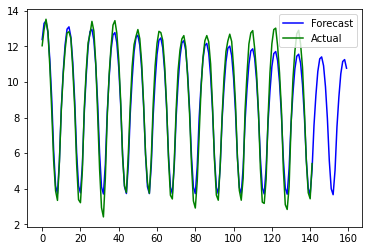

In [28]:
plt.plot(forecast["predicted_mean"], c = "b", label = "Forecast")
plt.plot(test2["area"], c = "g", label = "Actual")

plt.legend()

From the plot we can see that our forecast and actual values follow the same trend, meaning our SARIMA model is very accurate. Our plot also shows a forecast of values.

#Conclusion

To determine the area thickness of the Artic and Antractic ice, we utilized two time series models; ARIMA and SARIMA. To use these models to forecast the area thickness of the ice, we split our dataset into two groups one for training and the other for testing. After doing so we ran the ARIMA model which did not consider seasonality. Although the ARIMA model had a relatively low AIC and BIC score of: AIC = 604.145, BIC = 631.558, the model failed to predict the test values accurately. Because the ARIMA model does not consider seasonlity, we ran the data using the SARIMA model which does consider seasonlity and patterns associated. After running the SARIMA model we recieved an even lower score for our AIC and BIC:AIC = 481.182, BIC = 524.260, indicating a more accurate model. The SARIMA model was then shown to be able to predict the test values correctly and even forecasted future values which has been shown above. From these forecast values it indicates that there will be in increase in area thickness of ice in the Artic and Antartic. The forecast values also suggest a decrease after, following a periodic like wave; increasing then decreasing then increasing, etc. It is also important to note that the horizontal asymptotes for both decreasing to increasing, and increasing to decreasing seem to be decreasing in value overall. This could indicate a decrease in flucutation and an overall decrease in area ice thickness. Overall, we used ARIMA and SARIMA time series model to forecast the thickness of ice in the Artic and Antartic with forecast values for the next months/years.